<a href="https://colab.research.google.com/github/amandascholze/Data_Sci/blob/main/Scholze_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [2]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [3]:
#allows everything to run

In [4]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
#gpu = fast chip

In [6]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [7]:
url = "https://docs.google.com/presentation/d/1l8M6Tl6Z6d1WkSNkBu9iK5Df70aUZgATX_XEKxDOl-A/edit#slide=id.g1a11663ae21_0_145"

In [8]:
#link to photos

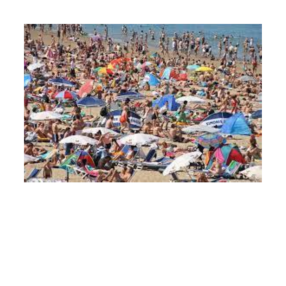

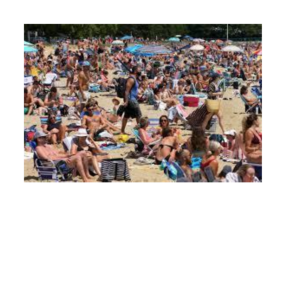

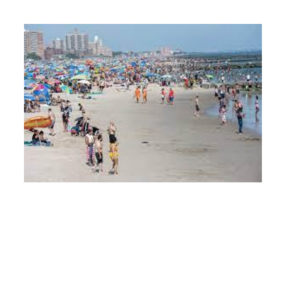

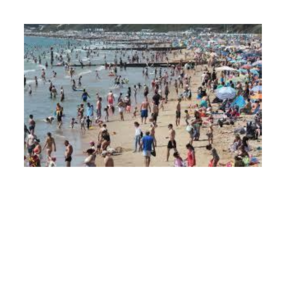

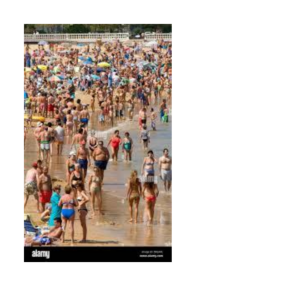

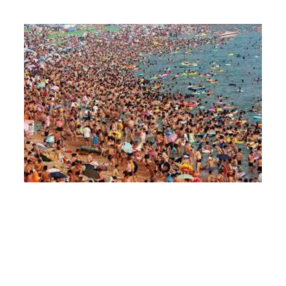

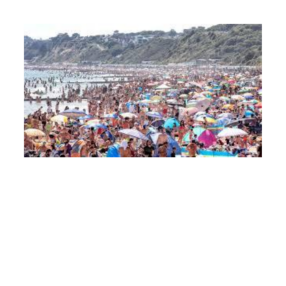

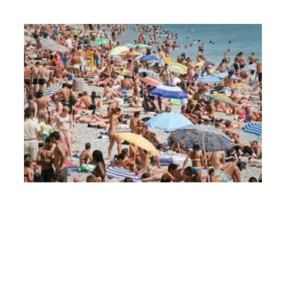

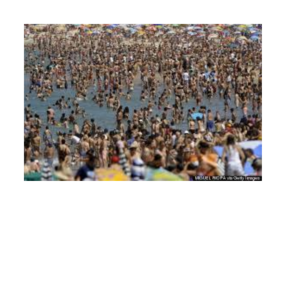

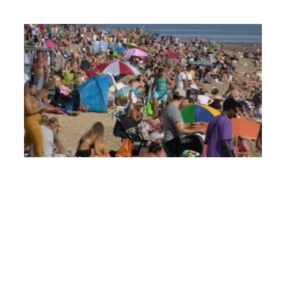

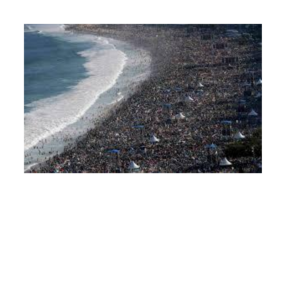

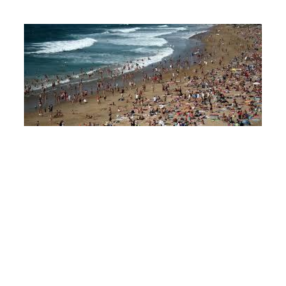

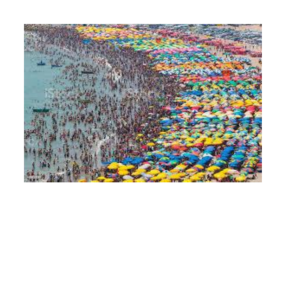

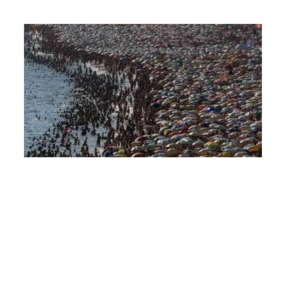

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images) #prints out all the images

In [ ]:
images.shape

In [13]:
#shows we brought in 50 imaged with 3 color changes and 224x224 pixels

In [11]:
model(images)

tensor([[-2.5145, -1.0059, -3.5715,  ..., -2.9876, -0.1886,  2.4546],
        [-2.5612, -1.5531, -3.1170,  ..., -2.4482,  1.2743,  1.9716],
        [-4.9990, -2.3475, -2.0713,  ..., -5.7808, -1.8823,  1.2263],
        ...,
        [ 1.4557, -2.6548, -0.5142,  ..., -5.3462, -1.1758,  0.5151],
        [ 1.3598, -2.1095,  2.5532,  ..., -0.8227,  1.3016, -0.6513],
        [-0.1256, -5.7367,  0.5637,  ..., -6.9296, -2.3277,  0.4022]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [15]:
y = model(images)

In [16]:
y.shape

torch.Size([50, 1000])

In [17]:
#turned images into a list of 1000 #

In [18]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [19]:
for i in list(guesses):
    print(labels[i])

jigsaw puzzle
web site, website, internet site, site
dogsled, dog sled, dog sleigh
web site, website, internet site, site
abacus
envelope
seashore, coast, seacoast, sea-coast
jigsaw puzzle
honeycomb
web site, website, internet site, site
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
seashore, coast, seacoast, sea-coast
envelope
thatch, thatched roof
web site, website, internet site, site
abacus
monitor
jigsaw puzzle
prayer rug, prayer mat
prayer rug, prayer mat
jigsaw puzzle
seashore, coast, seacoast, sea-coast
monitor
envelope
web site, website, internet site, site
sandbar, sand bar
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
s

In [20]:
#prints out what the program thinks the picture is

In [21]:
Y = np.zeros(50,) #answer key
Y[25:] = 1

In [22]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
X = y.detach().cpu().numpy() 

In [24]:
X.shape

(50, 1000)

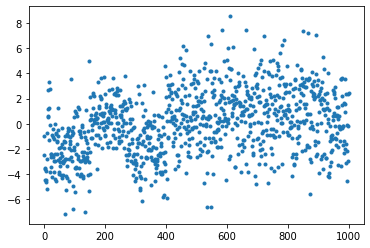

In [25]:
plt.plot(X[0],'.')

In [26]:
#plots the data

In [27]:
X[0]

array([-2.5145085 , -1.0059246 , -3.5715175 , -4.5009813 , -3.480978  ,
       -4.4638567 , -4.5927095 , -3.7360888 , -2.8080368 , -5.1979575 ,
       -0.71773076,  1.1491101 ,  0.51236194,  0.58713484,  2.6872907 ,
        1.2113544 , -1.2970486 ,  3.3516684 , -0.06232202,  2.7962058 ,
       -3.8218436 , -2.420901  , -2.6003356 , -2.3684976 , -3.4669912 ,
       -0.89691466, -4.2395205 , -2.4659078 , -2.6323862 , -1.0746181 ,
       -0.3776405 , -2.9394279 , -1.1910858 , -3.8025904 , -2.4194913 ,
       -4.384592  , -0.04559866, -2.983204  , -0.7113988 , -0.80654836,
       -4.5753236 , -1.3822429 , -1.466876  , -2.4347818 , -0.99155015,
        1.2547122 , -2.8744025 , -0.45878685, -3.868538  , -3.9545388 ,
       -1.9412752 , -3.3543668 , -3.0384054 , -2.7255218 , -2.346757  ,
       -4.0332723 , -1.8497398 , -4.330963  , -2.5721488 , -0.35656577,
       -1.5953922 , -2.978446  , -3.1025615 , -4.070012  , -2.9278665 ,
       -1.90919   , -1.3996027 , -1.4548938 , -0.9767525 , -2.77

In [28]:
np.argmax(X[25])

977

In [29]:

#shows highest number

In [30]:
labels[977]

'sandbar, sand bar'

In [31]:
top_ten = np.argsort(X[25])[::-1][0:10]

In [32]:
labels #all the possible. labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [33]:
for i in top_ten:
    print(labels[i]) #top 10 labels

sandbar, sand bar
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
stretcher
reel
pool table, billiard table, snooker table
lakeside, lakeshore
paper towel
street sign
patio, terrace


(array([  9.,  42., 135., 188., 239., 193., 133.,  44.,  10.,   7.]),
 array([-7.155894  , -5.5872397 , -4.018585  , -2.4499311 , -0.88127697,
         0.6873772 ,  2.2560315 ,  3.8246856 ,  5.3933396 ,  6.961994  ,
         8.530648  ], dtype=float32),
 <a list of 10 Patch objects>)

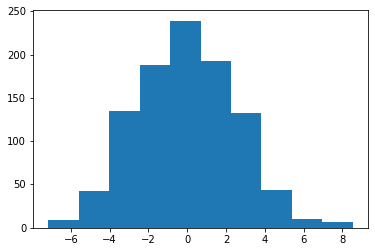

In [34]:
plt.hist(X[0])

In [35]:
X = GPU_data(X)
Y = GPU_data(Y)

In [36]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [37]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [38]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [39]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [40]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [41]:
X.shape

torch.Size([50, 1000])

In [42]:
#shape is an important tool

In [43]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [44]:
def model(x,w):

    return x@w[0]

In [45]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [48]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▃▁▃▁▃▃▃▁▄▄▅▄▅▅▆█████████████████████████
loss,▆█▆█▆▆▆█▅▅▄▅▄▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc_train,1.0
loss,0.31326


<ipython-input-4-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

https://tensorspace.org/

https://wandb.ai/scholze/Linear_Model_Photo_1?workspace=user-scholze

best was Scarlet-tree which was my second run which had an acc-train of .9957

worst was visonary-firefly which was my first run which had an acc-train of .9534

the average between all three runs was 0.971